In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
path = r"C:\Users\Andy\Desktop\洪災\中正\code\NOAA_全美.xlsx"
df = pd.read_excel(path, header = None)
len(df)

414

In [39]:
names = [df[0][i] for i in range(0,len(df),2)]
start = [df[1][i] for i in range(0,len(df),2)]
end = [df[2][i] for i in range(0,len(df),2)]
# cost = [df[2][i] for i in range(0,len(df),2)]
# death = [df[3][i] for i in range(5,399,3)]

In [41]:
# start
# end

In [42]:
# result = pd.DataFrame(np.array([names, start, end, cost, death]).T,columns=['事件名稱', '開始日期', '結束日期','CPI調整後估算的損失(十億美元)','死亡人數'])

result = pd.DataFrame(np.array([start, end]).T,columns=['開始日期', '結束日期'])

In [44]:
# result.head()

In [47]:
# for i in range(len(result.iloc[:,3])):
#     if type(result.iloc[i,3]) == str:
#         result.iloc[i,3] = float(result.iloc[i,3][2:5])
#         # print(result.iloc[i,3])
#         # result.iloc[i,3]

In [48]:
result.to_excel(r"C:\Users\Andy\Desktop\洪災\dataset\NOAA墨西哥灣災害事件_全美.xlsx")

In [39]:
time = []
for i in range(len(result)):
    a = result['開始日期'][i].year
    time.append(a)
time = set(time)

b = []
for i in time:
    str_time = str(i)+"-1-1"
    end_time = str(i)+"-12-31"
    tmp = result.set_index(['開始日期'])
    tmp = tmp.loc[str_time:end_time]
    b.append(max(tmp["CPI調整後估算的損失(十億美元)"]))
print(b)

36
[2.4, 1.2, 4.2, 8, 1.5, 3.7, 1.2, 2.1, 1.2, 50.8, 1.8, 9.5, 1.6, 9.6, 3.2, 1.4, 12.6, 3.1, 5.9, 28.7, 170, 2.1, 3.2, 36.9, 2.1, 4, 12.1, 3.8, 2.7, 1.9, 2.8, 11, 131.3, 25.7, 6.3, 14]


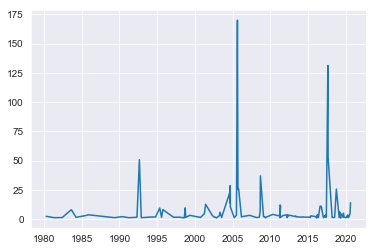

In [86]:
plt.plot(start,result.iloc[:,3])
plt.show()
# plt.savefig("test.png")

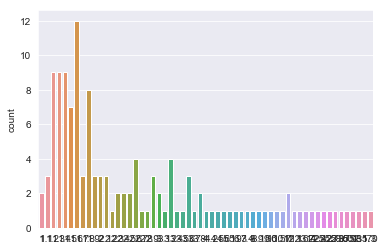

In [95]:
import seaborn as sns
sns.set_style(style="darkgrid")
# plt.figure(figsize = (15,8))
ax = sns.countplot(result.iloc[:,3].values)
# ax.set(xticks=(1980,2020))

In [100]:
test = result.iloc[:,[1,3]]
# test
nnn = test.groupby([test['開始日期'].dt.year]).sum()
# print (nnn)
# plt.plot(nnn.iloc[:,0])
nnn.to_excel(r"C:\Users\Andy\Desktop\洪災\dataset\NOAA墨西哥灣每年災害事件損失.xlsx")